# Simple Linear Regression: Predicting Stock Prices
This notebook demonstrates how to use simple linear regression to predict a stock's next-day closing price based on its previous-day closing price. We'll use Tesla (TSLA) stock prices from Yahoo Finance.



## Step 1: Import Libraries
We import the necessary libraries:
- `numpy`: For numerical operations.
- `pandas`: For data manipulation.
- `matplotlib`: For visualizations.
- `sklearn`: For machine learning (model training and testing).
- `yfinance`: For fetching historical stock prices.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import yfinance as yf

## Step 2: Fetch Stock Data
We fetch Tesla (TSLA) stock data for 2023 using `yfinance` and select only the **closing prices**.  
The data is reset to have a numerical index for easier manipulation.

### Example Output:
The first few rows will show the date and closing prices.


In [2]:
# Download Tesla stock prices (1yr)
stock_data = yf.download("TSLA", start="2023-01-01", end="2023-12-31")
stock_data = stock_data[['Close']]  # We only need closing prices
stock_data.reset_index(inplace=True)
stock_data.head()

[*********************100%***********************]  1 of 1 completed


Price,Date,Close
Ticker,,TSLA
0,2023-01-03,108.099998
1,2023-01-04,113.639999
2,2023-01-05,110.339996
3,2023-01-06,113.059998
4,2023-01-09,119.769997


## Step 3: Create Lagged Features
We create a new feature called `Previous_Close`, which shifts the closing price column by one day.  
This allows us to use the **previous day's price** as the independent variable to predict the **next day's price**.

We drop the first row with `NaN` values since the first row doesn't have a "previous day" value.


In [3]:
# Use the previous day's price to predict the next day's price
stock_data['Previous_Close'] = stock_data['Close'].shift(1)
stock_data = stock_data.dropna()  # Drop rows with missing values
stock_data.head()

Price,Date,Close,Previous_Close
Ticker,,TSLA,
1,2023-01-04,113.639999,108.099998
2,2023-01-05,110.339996,113.639999
3,2023-01-06,113.059998,110.339996
4,2023-01-09,119.769997,113.059998
5,2023-01-10,118.849998,119.769997


## Step 4: Define Variables
- **Independent variable (X):** Previous day's closing price.  
- **Dependent variable (y):** Current day's closing price.

We reshape `X` to ensure it has the correct dimensions for `scikit-learn` (2D array).

In [4]:
# Independent variable (X) and dependent variable (y)
X = stock_data['Previous_Close'].values.reshape(-1, 1)
y = stock_data['Close'].values

## Step 5: Split Data
We split the dataset into:
- **Training Set (80%):** Used to train the model.  
- **Testing Set (20%):** Used to evaluate the model's performance.

The `random_state` ensures reproducibility of the results.


In [5]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Step 6: Train the Model
We use the `LinearRegression` class from `sklearn` to create and train a simple linear regression model.  
The model learns the relationship between `Previous_Close` and `Close` using the training data.


In [6]:
# Train a simple linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Step 7: Make Predictions
The trained model predicts the next day's closing prices (`y_pred`) for the test dataset (`X_test`).


In [8]:
# Predict stock prices
y_pred = model.predict(X_test)

## Step 8: Visualize the Results
We create a scatterplot to compare:
- **Actual Prices (blue):** Ground truth from the test dataset.
- **Predicted Prices (red line):** Predictions made by the model.

The red line represents the **best-fit line** found by linear regression.


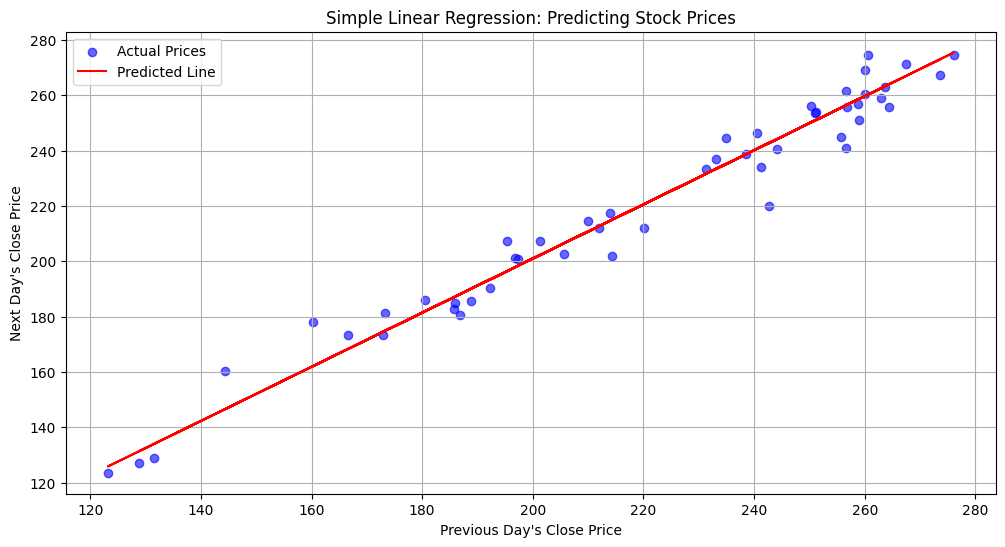

In [9]:
# Visualize the results
plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual Prices', alpha=0.6)
plt.plot(X_test, y_pred, color='red', label='Predicted Line')
plt.title("Simple Linear Regression: Predicting Stock Prices")
plt.xlabel("Previous Day's Close Price")
plt.ylabel("Next Day's Close Price")
plt.legend()
plt.grid(True)
plt.show()

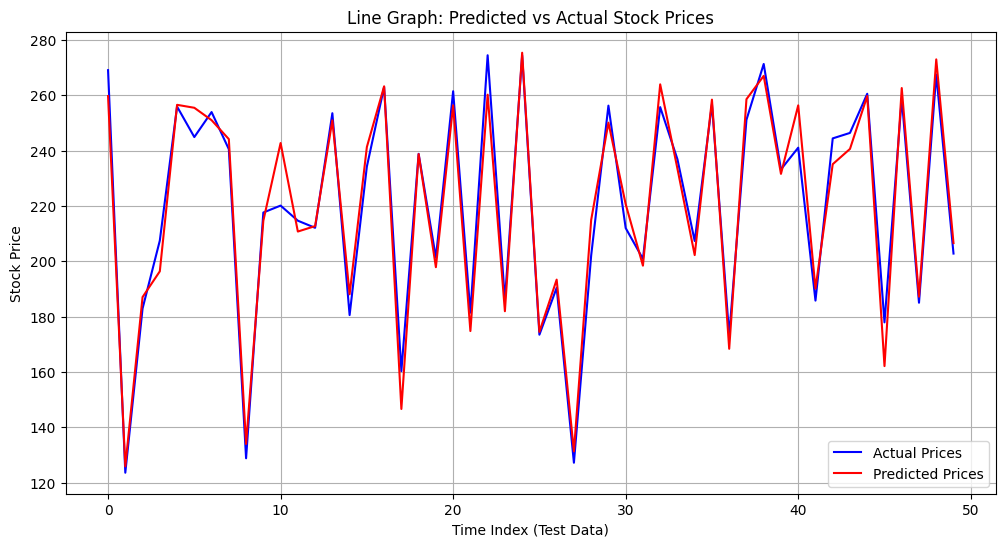

In [10]:
# Line graph visualization
plt.figure(figsize=(12, 6))
plt.plot(range(len(y_test)), y_test, label='Actual Prices', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Prices', color='red')
plt.title("Line Graph: Predicted vs Actual Stock Prices")
plt.xlabel("Time Index (Test Data)")
plt.ylabel("Stock Price")
plt.legend()
plt.grid(True)
plt.show()

## Step 9: Evaluate the Model
The model's performance is evaluated using:
- **Slope (m):** How much the next day's price changes for a unit change in the previous day's price.
- **Intercept (c):** The baseline price when the previous day's price is 0.
- **R-squared score:** Measures how well the model explains the variance in the test data. Values closer to 1 indicate a better fit.


In [11]:
# Evaluate the model
print("Model Coefficients:")
print(f"Gradient:, {model.coef_[0,0]:.4f}")  # Extract the first coefficient (gradient)
print(f"y-intercept (c):, {model.intercept_[0]:.4f}")
print("\nModel Performance:")
print(f"R-squared score:, {model.score(X_test, y_test):.4f}")

Model Coefficients:
Gradient:, 0.9784
y-intercept (c):, 5.2943

Model Performance:
R-squared score:, 0.9653
